In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os 
import tensorflow as tf 
tf.__version__

'2.10.1'

In [2]:
df = pd.read_csv('2.1 AAPL.csv')

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
df = df['open'].values
df = df.reshape(-1,1)

In [5]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8) - 50: ])

In [6]:
print(dataset_train.shape)
print(dataset_test.shape)

(1007, 1)
(302, 1)


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.15550899],
       [0.16002875],
       [0.16546966],
       [0.1432353 ],
       [0.13837263],
       [0.14619996],
       [0.1321915 ]])

In [8]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:8]

array([[0.7048619 ],
       [0.70865789],
       [0.70043325],
       [0.71080895],
       [0.69518213],
       [0.68006144],
       [0.69056368],
       [0.68423703]])

In [9]:
def create_my_dataset(df):
    x = []
    y = []
    
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
        
    x = np.array(x)
    y = np.array(y)
    return x, y

In [10]:
x_train, y_train = create_my_dataset(dataset_train)

In [11]:
x_test, y_test = create_my_dataset(dataset_test)

In [12]:
x_test.shape

(252, 50)

In [13]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [14]:
model = Sequential()
model.add(LSTM(units = 96, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 96, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 96))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 96)                74112     
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense (Dense)               (None, 1)                 9

In [16]:
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [17]:
if (not os.path.exists(r'E:\Data Science\Leaning\Courses Learning\Sentiment and stock price prediction deep learning\LSTM\stock_predictions.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save(r'E:\Data Science\Leaning\Courses Learning\Sentiment and stock price prediction deep learning\LSTM\stock_predictions.h5')

Epoch 1/50
30/30 [==============================] - 4s 16ms/step - loss: 0.0439
Epoch 2/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0060
Epoch 3/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0051
Epoch 4/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0046
Epoch 5/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0046
Epoch 6/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0044
Epoch 7/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0044
Epoch 8/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0044
Epoch 9/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0040
Epoch 10/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0040
Epoch 11/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0035
Epoch 12/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0040
Epoch 13/50
30/30 [==================

In [18]:
model1 = load_model(r"E:\Data Science\Leaning\Courses Learning\Sentiment and stock price prediction deep learning\LSTM\stock_predictions.h5")

In [19]:
predictions = model.predict(x_test)
predictions

8/8 [==============================] - 1s 6ms/step


array([[0.92933697],
       [0.94552094],
       [0.9583192 ],
       [0.9682423 ],
       [0.9759905 ],
       [0.9819939 ],
       [0.9894527 ],
       [0.9975791 ],
       [1.003936  ],
       [1.0096916 ],
       [1.0147414 ],
       [1.0202332 ],
       [1.022994  ],
       [1.0251974 ],
       [1.0269797 ],
       [1.0297024 ],
       [1.0364538 ],
       [1.0433407 ],
       [1.0497565 ],
       [1.0542997 ],
       [1.0566196 ],
       [1.0568072 ],
       [1.056527  ],
       [1.0556244 ],
       [1.055252  ],
       [1.0556692 ],
       [1.0588344 ],
       [1.064122  ],
       [1.0689299 ],
       [1.075242  ],
       [1.0780095 ],
       [1.079801  ],
       [1.0814582 ],
       [1.0793868 ],
       [1.0773071 ],
       [1.0807756 ],
       [1.0891125 ],
       [1.0984793 ],
       [1.1064382 ],
       [1.1110579 ],
       [1.1142331 ],
       [1.1164043 ],
       [1.1167381 ],
       [1.1155062 ],
       [1.1123445 ],
       [1.1060835 ],
       [1.0991642 ],
       [1.092

In [20]:
predictions = scaler.inverse_transform(predictions)

In [21]:
predictions

array([[128.87045],
       [130.14948],
       [131.16093],
       [131.94516],
       [132.55751],
       [133.03197],
       [133.62144],
       [134.26367],
       [134.76607],
       [135.22093],
       [135.62003],
       [136.05405],
       [136.27223],
       [136.44637],
       [136.58722],
       [136.8024 ],
       [137.33597],
       [137.88025],
       [138.3873 ],
       [138.74635],
       [138.92969],
       [138.94452],
       [138.92238],
       [138.85104],
       [138.82161],
       [138.85458],
       [139.10474],
       [139.52261],
       [139.90259],
       [140.40144],
       [140.62015],
       [140.76173],
       [140.8927 ],
       [140.729  ],
       [140.56464],
       [140.83876],
       [141.49763],
       [142.2379 ],
       [142.8669 ],
       [143.232  ],
       [143.48294],
       [143.65453],
       [143.68091],
       [143.58354],
       [143.33368],
       [142.83887],
       [142.29202],
       [141.76477],
       [141.33525],
       [141.11023],


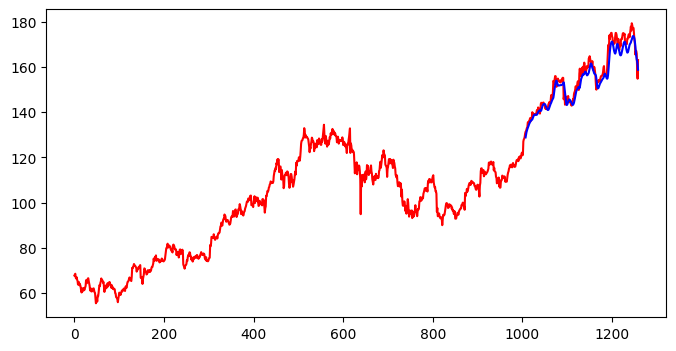

In [25]:
fig, ax = plt.subplots(figsize = (8, 4))
plt.plot(df, color = 'red', label = 'original Stockprice')
ax.plot(range(len(y_train)+50, len(y_train)+ 50 + len(predictions)), predictions, color = 'blue')

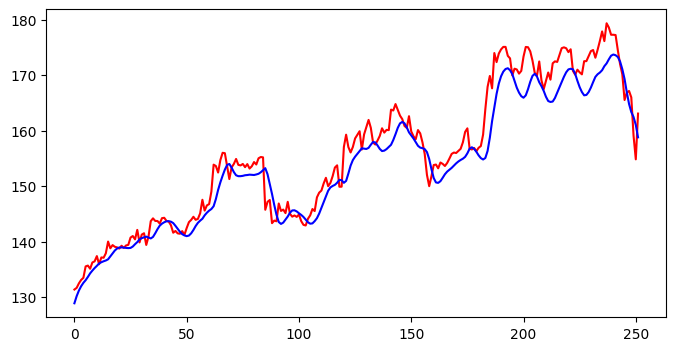

In [27]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(y_test_scaled, color = 'red', label = 'True price')
plt.plot(predictions, color = 'blue')